In [9]:
import numpy as np
from numpy import genfromtxt
from itertools import combinations
import torch
import math 
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%run r3b_clustering_def.ipynb
%run agglomerative_def.ipynb
%run ff_models_def.ipynb
%run var1_2_agglo_edge.ipynb

#### 1) r3b

continuous numbers: [    0     0     0 ... 13498 13499 13499]
(26758, 5)
[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.3497e+04 1.3498e+04 1.3499e+04]
well reco... 0.8582857989480702
---more statistics....---
fully true_reco_cluster:	 0.7184444444444444
false positive events:	 0.060444444444444446
false negative events:	 0.15866666666666668
mixed false events:	 0.06244444444444444
end of statistiscs------


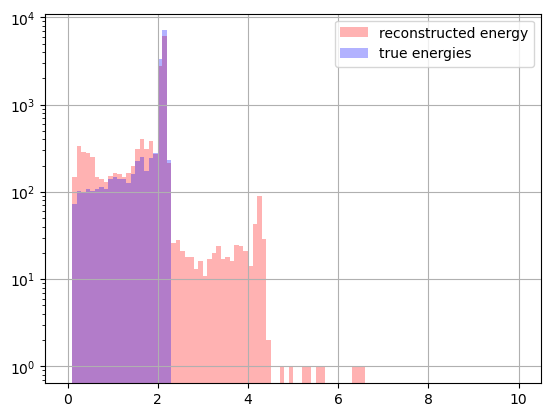

In [2]:
data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt',delimiter=',')
data[:,4] = 1  #this step is needed, I only want positive time values, so that I can use the time as a radius
# ### structure of mydata : eventnr, energy, theta, phi, hit-time
data = data*[1.,1.,3.14159/180,3.14159/180,1.]
unique_values, continuous_numbers = np.unique(data[:,0], return_inverse=True)
data[:,0] = continuous_numbers
print("continuous numbers:", continuous_numbers)
out_cluster_r3b = run_r3b_clustering(data,0.25)
#foo = plot_true_reco(data)
foo_comb = get_true_combinatorics(data)
foo_ene = get_true_reco_ene(data,out_cluster_r3b,foo_comb)

***

#### 2) agglo

13497
Progress: 0.00%
Progress: 22.22%
Progress: 44.44%
Progress: 66.67%
Progress: 88.89%
well reco... 0.8912512037928736
---more statistics....---
fully true_reco_cluster:	 0.7602222222222222
false positive events:	 0.051111111111111114
false negative events:	 0.17044444444444445
mixed false events:	 0.018222222222222223
end of statistiscs------


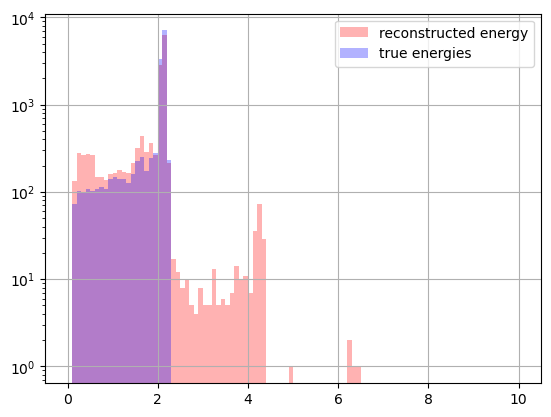

In [3]:
data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt', delimiter=',')
data[:,4] = data[:,4]+4500  #this step is needed, I only want positive time values, so that I can use the time as a radius
#my_data[:,4] = 1  #this step is needed, I only want positive time values, so that I can use the time as a radius

# ### structure of mydata : eventnr, energy, theta, phi, hit-time
data = data*[1.,1.,3.14159/180,3.14159/180,1.]
unique_values, continuous_numbers = np.unique(data[:,0], return_inverse=True)
data[:,0] = continuous_numbers
out_cluster_agglo = run_agglo_clustering(data,3540)
foo_comb = get_true_combinatorics(data)
foo_ene = get_true_reco_ene(data,out_cluster_agglo,foo_comb)

***

#### 3a) Edge - no time

this is my device cuda
training data read
I start manipulating data...
my device for training the model is: cuda:0
Model's state_dict:
linear.weight 	 torch.Size([1000, 12])
linear.bias 	 torch.Size([1000])
another_linear.weight 	 torch.Size([100, 1000])
another_linear.bias 	 torch.Size([100])
another_linear_two.weight 	 torch.Size([100, 100])
another_linear_two.bias 	 torch.Size([100])
linear_back.weight 	 torch.Size([1, 100])
linear_back.bias 	 torch.Size([1])
Progress: 0.00%
Progress: 0.20%
Progress: 0.40%
Progress: 0.60%
Progress: 0.80%
Progress: 1.00%
Progress: 1.20%
Progress: 1.40%
Progress: 1.60%
Progress: 1.80%
Progress: 2.00%
Progress: 2.20%
Progress: 2.40%
Progress: 2.60%
Progress: 2.80%
Progress: 3.00%
Progress: 3.20%
Progress: 3.40%
Progress: 3.60%
Progress: 3.80%
Progress: 4.00%
Progress: 4.20%
Progress: 4.40%
Progress: 4.60%
Progress: 4.80%
Progress: 5.00%
Progress: 5.20%
Progress: 5.40%
Progress: 5.60%
Progress: 5.80%
Progress: 6.00%
Progress: 6.20%
Progress: 6.40%
Progr

Progress: 91.60%
Progress: 91.80%
Progress: 92.00%
Progress: 92.20%
Progress: 92.40%
Progress: 92.60%
Progress: 92.80%
Progress: 93.00%
Progress: 93.20%
Progress: 93.40%
Progress: 93.60%
Progress: 93.80%
Progress: 94.00%
Progress: 94.20%
Progress: 94.40%
Progress: 94.60%
Progress: 94.80%
Progress: 95.00%
Progress: 95.20%
Progress: 95.40%
Progress: 95.60%
Progress: 95.80%
Progress: 96.00%
Progress: 96.20%
Progress: 96.40%
Progress: 96.60%
Progress: 96.80%
Progress: 97.00%
Progress: 97.20%
Progress: 97.40%
Progress: 97.60%
Progress: 97.80%
Progress: 98.00%
Progress: 98.20%
Progress: 98.40%
Progress: 98.60%
Progress: 98.80%
Progress: 99.00%
Progress: 99.20%
Progress: 99.40%
Progress: 99.60%
Progress: 99.80%
this is latest loss val:	 0.10112918168306351
hello I am inside no grad
pred_training finished
well reco... 0.8905997015778279
---more statistics....---
fully true_reco_cluster:	 0.7449523809523809
false positive events:	 0.039714285714285716
false negative events:	 0.20152380952380952

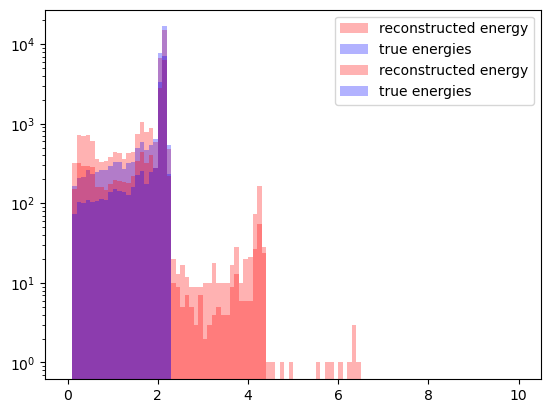

In [4]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("this is my device",device)
training_data = genfromtxt('./sim_data/data_2_1_mev/training_raw.txt', delimiter=',')
print("training data read")
## some data manipulation needed
training_data[:,4] =(training_data[:,4]-np.min(training_data[:,4]))/(np.max(training_data[:,4])-np.min(training_data[:,4]))
unique_values, continuous_numbers = np.unique(training_data[:,0], return_inverse=True)
training_data[:,0] = continuous_numbers
training_data[:,2] = training_data[:,2]*math.pi/180.
training_data[:,3] = training_data[:,3]*math.pi/180.
training_data[:,4] = 1  ## set time to 1, not sensitive to time, TODO: remove later, just a test
training_true = get_true_combinatorics(training_data)
print("I start manipulating data...")
input_training_data = manip_data_ff(training_data,12) ##second param gives number of features
pred_training = train_two_hidden_model(input_training_data,torch.FloatTensor(training_true),12,1000,5e-3,100)
#pred_training = train_two_hidden_model(input_training_data,torch.FloatTensor(training_true),12,1000,5e-3,100)
print("pred_training finished")
training_reco = get_true_reco_ene(training_data,pred_training[0].tolist(),training_true)

###testing
val_data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt', delimiter=',')
## some data manipulation needed
val_data[:,4] =(val_data[:,4]-np.min(val_data[:,4]))/(np.max(val_data[:,4])-np.min(val_data[:,4]))
unique_values, continuous_numbers = np.unique(val_data[:,0], return_inverse=True)
val_data[:,0] = continuous_numbers
val_data[:,2] = val_data[:,2]*math.pi/180.
val_data[:,3] = val_data[:,3]*math.pi/180.
val_data[:,4] = 1 ## set time to 1, not sensitive to time, TODO: remove later, just a test
val_true = get_true_combinatorics(val_data)
input_val_data = manip_data_ff(val_data,12) ##second param gives number of features

pred_val = validate_two_hidden_model(input_val_data,torch.FloatTensor(val_true),12,1000,5e-3,100)

val_reco = get_true_reco_ene(val_data,pred_val[0].tolist(),val_true)

***

#### 3b) Edge with time

before training true
my device for training the model is: cuda:0
Model's state_dict:
linear.weight 	 torch.Size([1000, 12])
linear.bias 	 torch.Size([1000])
another_linear.weight 	 torch.Size([100, 1000])
another_linear.bias 	 torch.Size([100])
another_linear_two.weight 	 torch.Size([100, 100])
another_linear_two.bias 	 torch.Size([100])
linear_back.weight 	 torch.Size([1, 100])
linear_back.bias 	 torch.Size([1])
Progress: 0.00%
Progress: 0.20%
Progress: 0.40%
Progress: 0.60%
Progress: 0.80%
Progress: 1.00%
Progress: 1.20%
Progress: 1.40%
Progress: 1.60%
Progress: 1.80%
Progress: 2.00%
Progress: 2.20%
Progress: 2.40%
Progress: 2.60%
Progress: 2.80%
Progress: 3.00%
Progress: 3.20%
Progress: 3.40%
Progress: 3.60%
Progress: 3.80%
Progress: 4.00%
Progress: 4.20%
Progress: 4.40%
Progress: 4.60%
Progress: 4.80%
Progress: 5.00%
Progress: 5.20%
Progress: 5.40%
Progress: 5.60%
Progress: 5.80%
Progress: 6.00%
Progress: 6.20%
Progress: 6.40%
Progress: 6.60%
Progress: 6.80%
Progress: 7.00%
Progres

Progress: 92.20%
Progress: 92.40%
Progress: 92.60%
Progress: 92.80%
Progress: 93.00%
Progress: 93.20%
Progress: 93.40%
Progress: 93.60%
Progress: 93.80%
Progress: 94.00%
Progress: 94.20%
Progress: 94.40%
Progress: 94.60%
Progress: 94.80%
Progress: 95.00%
Progress: 95.20%
Progress: 95.40%
Progress: 95.60%
Progress: 95.80%
Progress: 96.00%
Progress: 96.20%
Progress: 96.40%
Progress: 96.60%
Progress: 96.80%
Progress: 97.00%
Progress: 97.20%
Progress: 97.40%
Progress: 97.60%
Progress: 97.80%
Progress: 98.00%
Progress: 98.20%
Progress: 98.40%
Progress: 98.60%
Progress: 98.80%
Progress: 99.00%
Progress: 99.20%
Progress: 99.40%
Progress: 99.60%
Progress: 99.80%
this is latest loss val:	 0.04652642458677292
hello I am inside no grad
well reco... 0.938537731356551
---more statistics....---
fully true_reco_cluster:	 0.8468571428571429
false positive events:	 0.019428571428571427
false negative events:	 0.12895238095238096
mixed false events:	 0.004761904761904762
end of statistiscs------
well re

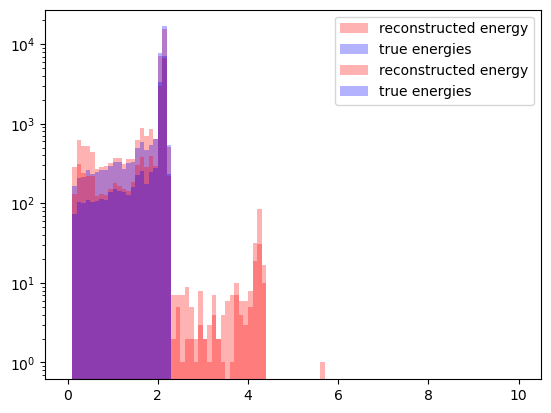

In [5]:
training_data = genfromtxt('./sim_data/data_2_1_mev/training_raw.txt', delimiter=',')
## some data manipulation needed
training_data[:,4] =(training_data[:,4]-np.min(training_data[:,4]))/(np.max(training_data[:,4])-np.min(training_data[:,4]))
unique_values, continuous_numbers = np.unique(training_data[:,0], return_inverse=True)
training_data[:,0] = continuous_numbers
training_data[:,2] = training_data[:,2]*math.pi/180.
training_data[:,3] = training_data[:,3]*math.pi/180.
#training_data[:,4] = 1  ## set time to 1, not sensitive to time, TODO: remove later, just a test
print("before training true")
training_true = get_true_combinatorics(training_data)
input_training_data = manip_data_ff(training_data,12) ##second param gives number of features

pred_training = train_two_hidden_model(input_training_data,torch.FloatTensor(training_true),12,1000,5e-3,100)

training_reco = get_true_reco_ene(training_data,pred_training[0].tolist(),training_true)


###testing
val_data = genfromtxt('./sim_data/data_2_1_mev/test_raw.txt', delimiter=',')
## some data manipulation needed
val_data[:,4] =(val_data[:,4]-np.min(val_data[:,4]))/(np.max(val_data[:,4])-np.min(val_data[:,4]))
unique_values, continuous_numbers = np.unique(val_data[:,0], return_inverse=True)
val_data[:,0] = continuous_numbers
val_data[:,2] = val_data[:,2]*math.pi/180.
val_data[:,3] = val_data[:,3]*math.pi/180.
#val_data[:,4] = 1 ## set time to 1, not sensitive to time, TODO: remove later, just a test
val_true = get_true_combinatorics(val_data)
input_val_data = manip_data_ff(val_data,12) ##second param gives number of features

pred_val = validate_two_hidden_model(input_val_data,torch.FloatTensor(val_true),12,1000,5e-3,100)

val_reco = get_true_reco_ene(val_data,pred_val[0].tolist(),val_true)

***

#### 4) Agglo + Edge

my device for training the model is: cuda:0
Model's state_dict:
linear.weight 	 torch.Size([1000, 12])
linear.bias 	 torch.Size([1000])
another_linear.weight 	 torch.Size([100, 1000])
another_linear.bias 	 torch.Size([100])
another_linear_two.weight 	 torch.Size([100, 100])
another_linear_two.bias 	 torch.Size([100])
linear_back.weight 	 torch.Size([1, 100])
linear_back.bias 	 torch.Size([1])
Progress: 0.00%
Progress: 0.20%
Progress: 0.40%
Progress: 0.60%
Progress: 0.80%
Progress: 1.00%
Progress: 1.20%
Progress: 1.40%
Progress: 1.60%
Progress: 1.80%
Progress: 2.00%
Progress: 2.20%
Progress: 2.40%
Progress: 2.60%
Progress: 2.80%
Progress: 3.00%
Progress: 3.20%
Progress: 3.40%
Progress: 3.60%
Progress: 3.80%
Progress: 4.00%
Progress: 4.20%
Progress: 4.40%
Progress: 4.60%
Progress: 4.80%
Progress: 5.00%
Progress: 5.20%
Progress: 5.40%
Progress: 5.60%
Progress: 5.80%
Progress: 6.00%
Progress: 6.20%
Progress: 6.40%
Progress: 6.60%
Progress: 6.80%
Progress: 7.00%
Progress: 7.20%
Progress: 7.

Progress: 92.40%
Progress: 92.60%
Progress: 92.80%
Progress: 93.00%
Progress: 93.20%
Progress: 93.40%
Progress: 93.60%
Progress: 93.80%
Progress: 94.00%
Progress: 94.20%
Progress: 94.40%
Progress: 94.60%
Progress: 94.80%
Progress: 95.00%
Progress: 95.20%
Progress: 95.40%
Progress: 95.60%
Progress: 95.80%
Progress: 96.00%
Progress: 96.20%
Progress: 96.40%
Progress: 96.60%
Progress: 96.80%
Progress: 97.00%
Progress: 97.20%
Progress: 97.40%
Progress: 97.60%
Progress: 97.80%
Progress: 98.00%
Progress: 98.20%
Progress: 98.40%
Progress: 98.60%
Progress: 98.80%
Progress: 99.00%
Progress: 99.20%
Progress: 99.40%
Progress: 99.60%
Progress: 99.80%
this is latest loss val:	 0.03391490504145622
hello I am inside no grad
well reco... 0.9714285714285714
---more statistics....---
fully true_reco_cluster:	 0.9472190692395006
false positive events:	 0.030079455164585697
false negative events:	 0.019863791146424517
mixed false events:	 0.0028376844494892167
end of statistiscs------
13497
Progress: 0.00%

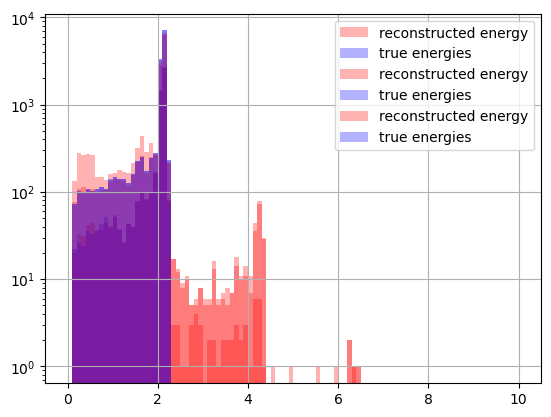

In [6]:
res_var2_2_1mev = var2_agglo_edge("./sim_data/data_2_1_mev/false_neg_2_1_mev.txt","./sim_data/data_2_1_mev/test_raw.txt","./sim_data/data_2_1_mev/precluster_test.txt")

***

#### 5) R3b + Edge no time

my device for training the model is: cuda:1
Model's state_dict:
linear.weight 	 torch.Size([1000, 12])
linear.bias 	 torch.Size([1000])
another_linear.weight 	 torch.Size([100, 1000])
another_linear.bias 	 torch.Size([100])
another_linear_two.weight 	 torch.Size([100, 100])
another_linear_two.bias 	 torch.Size([100])
linear_back.weight 	 torch.Size([1, 100])
linear_back.bias 	 torch.Size([1])
Progress: 0.00%
Progress: 0.12%
Progress: 0.25%
Progress: 0.38%
Progress: 0.50%
Progress: 0.62%
Progress: 0.75%
Progress: 0.88%
Progress: 1.00%
Progress: 1.12%
Progress: 1.25%
Progress: 1.38%
Progress: 1.50%
Progress: 1.62%
Progress: 1.75%
Progress: 1.88%
Progress: 2.00%
Progress: 2.12%
Progress: 2.25%
Progress: 2.38%
Progress: 2.50%
Progress: 2.62%
Progress: 2.75%
Progress: 2.88%
Progress: 3.00%
Progress: 3.12%
Progress: 3.25%
Progress: 3.38%
Progress: 3.50%
Progress: 3.62%
Progress: 3.75%
Progress: 3.88%
Progress: 4.00%
Progress: 4.12%
Progress: 4.25%
Progress: 4.38%
Progress: 4.50%
Progress: 4.

Progress: 58.00%
Progress: 58.13%
Progress: 58.25%
Progress: 58.38%
Progress: 58.50%
Progress: 58.63%
Progress: 58.75%
Progress: 58.88%
Progress: 59.00%
Progress: 59.13%
Progress: 59.25%
Progress: 59.38%
Progress: 59.50%
Progress: 59.62%
Progress: 59.75%
Progress: 59.88%
Progress: 60.00%
Progress: 60.12%
Progress: 60.25%
Progress: 60.38%
Progress: 60.50%
Progress: 60.62%
Progress: 60.75%
Progress: 60.88%
Progress: 61.00%
Progress: 61.12%
Progress: 61.25%
Progress: 61.38%
Progress: 61.50%
Progress: 61.62%
Progress: 61.75%
Progress: 61.88%
Progress: 62.00%
Progress: 62.12%
Progress: 62.25%
Progress: 62.38%
Progress: 62.50%
Progress: 62.62%
Progress: 62.75%
Progress: 62.88%
Progress: 63.00%
Progress: 63.12%
Progress: 63.25%
Progress: 63.38%
Progress: 63.50%
Progress: 63.62%
Progress: 63.75%
Progress: 63.88%
Progress: 64.00%
Progress: 64.12%
Progress: 64.25%
Progress: 64.38%
Progress: 64.50%
Progress: 64.62%
Progress: 64.75%
Progress: 64.88%
Progress: 65.00%
Progress: 65.12%
Progress: 65.2

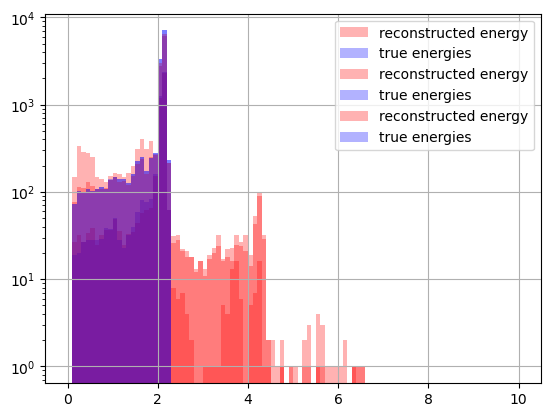

In [10]:
res_var2_r3b_edge = var2_r3b_edge("./sim_data/data_2_1_mev/false_neg_uniform_r3b.txt","./sim_data/data_2_1_mev/test_raw.txt","./sim_data/data_2_1_mev/precluster_r3b_test.txt")